<a href="https://colab.research.google.com/github/kofibeans/APM1111-FA5/blob/main/APM1111_FA5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**APM1111 - FORMATIVE ASSESSMENT 5**

### **Details**
1.   Answer 8.18 using Python or R.
2.   Answer 8.21, 8.34
3.   Answer 8.49

### **Import modules**
Run the following code cell to import modules.

In [ ]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt
from IPython.display import display, HTML

### **1. 8.18:**
List all samples of size $n = 2$ that are possible (with replacement) from the population in Problem 8.17. Using Python or R, plot the sampling distribution of the mean to show $μ_{\bar{x}}$, and show that $σ^{2}_{\bar{x}} = σ^{2} / 2.$

>*Problem 8.17*: Midwestern University has 1/3 of its students taking 9 credit hours, 1/3 taking 12 credit hours, and 1/3 taking 15 credit hours. If $X$ represents the credit hours a student is taking, the distribution of $%$ is $p(x) = 1/3$ for $x$ = 9, 12, and 15. Find the mean and variance of $X$. What type of distribution does $X$ have?
>> *   $μ = ∑xp(x) = 9(1/3) + 12(1/3) + 15(1/3) = 12$
>> * $σ^{2} = ∑xp(x) - μ^{2} = 81(1/3) + 144(1/3) + 225(1/3) - 144 = 150 -144 = 6$
>> * Uniform Distribution



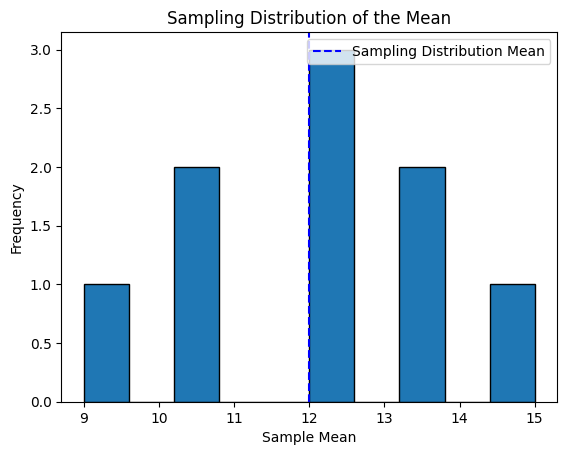

,Sample A,Mean,x_bar,p(xbar),xbar * p(xbar),xbar^2 * p(xbar)
0,"(9, 9)",9.000000,9.000000,0.111111,0.999999,8.999991
1,"(9, 12)",10.500000,10.500000,0.222222,2.333331,24.499976
2,"(9, 15)",12.000000,12.000000,0.333333,3.999996,47.999952
3,"(12, 9)",10.500000,13.500000,0.222222,2.999997,40.499960
4,"(12, 12)",12.000000,15.000000,0.111111,1.666665,24.999975
5,"(12, 15)",13.500000,nan,nan,nan,nan
6,"(15, 9)",12.000000,nan,nan,nan,nan
7,"(15, 12)",13.500000,nan,nan,nan,nan
8,"(15, 15)",15.000000,nan,nan,nan,nan


,Population Mean,Population Variance,Sampling Distribution Mean,Sampling Distribution Variance
0,12.000000,6.000000,12.000000,3.000000


In [ ]:
# define the variables
students_mu = [9, 12, 15]
xbar_values = [9, 10.5, 12, 13.5, 15, np.nan, np.nan, np.nan, np.nan]
pxbar_values = [0.111111, 0.222222, 0.333333, 0.222222, 0.111111, np.nan, np.nan, np.nan, np.nan]

# generate all possible samples of size 2 with replacement
samples_mu = list(it.product(students_mu, repeat = 2))

# calculate the sample means
mu_sample_means = [np.mean(sample) for sample in samples_mu]

# calculate the rest
xbar_values_cleaned = [float(x) if not np.isnan(x) else np.nan for x in xbar_values]
x_px_bar = np.array(xbar_values_cleaned) *pxbar_values
x2_px_bar = (np.array(xbar_values_cleaned)**2) * pxbar_values

# calculate the population mean and variance
popu_mean = np.mean(students_mu)
popu_var = np.var(students_mu)

# calculate the sampling distribution mean and variance
samp_dist_mean = np.mean(mu_sample_means)
samp_dist_var = popu_var / 2

# plot
plt.hist(mu_sample_means, bins = 10, edgecolor = 'black')
plt.axvline(x = samp_dist_mean, color = 'blue', linestyle = '--', label = 'Sampling Distribution Mean')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of the Mean')
plt.legend()
plt.show()

display(HTML('<br>'))

# create a dataframe to display the results
results_df = pd.DataFrame({
    'Sample A': samples_mu,
    'Mean': mu_sample_means,
    'x_bar': xbar_values_cleaned,
    'p(xbar)': pxbar_values,
    'xbar * p(xbar)': x_px_bar,
    'xbar^2 * p(xbar)': x2_px_bar
})

# create a dataframe to show distribution stuffs
dist_df = pd.DataFrame({
    'Population Mean': [popu_mean],
    'Population Variance': [popu_var],
    'Sampling Distribution Mean': [samp_dist_mean],
    'Sampling Distribution Variance': [samp_dist_var]
})

# display the results
display(results_df.style)

display(HTML('<br>'))

# display the results
dist_df.style

### **2. 8.21:**
A population of the four numbers 3, 7, 11, and 15. Consider all possible samples of size 2 that can be drawn with replacement from this population. Find *(a)* the population mean, *(b)* the population standard deviation, *(c)* the mean of sampling distribution of means, and *(d)* the standard deviation of the sampling distribution of means. Verify parts *(c)* and *(d)* by using suitable formula.

In [ ]:
# define the variables
population = [3, 7, 11, 15]

# generate all possible samples with replacement
samples = list(it.product(population, repeat = 2))

# calculate the population means and standard deviation
popu_means = np.mean(population).round(2)
popu_std = np.std(population).round(2)

# calculate the mean of the sampling distribution of means
sample_means = np.mean(samples, axis = 1).round(2)
mean_sampling_dist = np.mean(sample_means).round(2)
sample_std = np.std(sample_means).round(2)

# create a dataframe to display the results
summary_df = pd.DataFrame({
    'Population Mean': [popu_mean],
    'Population Std. Dev.': [popu_std],
    'Sampling Dist. Mean': [mean_sampling_dist],
    'Sampling Dist. Std. Dev.': [sample_std]
}, index=['Results'])

# display the results
display(summary_df.style)

,Population Mean,Population Std. Dev.,Sampling Dist. Mean,Sampling Dist. Std. Dev.
Results,9.000000,4.470000,9.000000,3.160000


### **2. 8.34:**
Find the probability that of the next 200 children born, *(a)* less than 40% will be boys, *(b)* between 43% and 57% will be girls, and *(c)* more than 54% will be boys. Assume equal probabilities for the births of boys and girls.

In [ ]:
# define the parameters
n = 200
p = 0.5

# calculate the probabilities
prob_less_than_40 = stats.binom.cdf(0.40 * n, n, p)

prob_less_than_43 = stats.binom.cdf(0.43 * n, n, p)
prob_less_than_57 = stats.binom.cdf(0.57 * n, n, p)
prob_between_43_57 = prob_less_than_57 - prob_less_than_43

prob_more_than_54 = 1 - stats.binom.cdf(0.54 * n, n, p)

# print the results
print("Probability that less than 40% will be boys:", round(prob_less_than_40, 4))
print("Probability that between 43% and 57% will be girls:", round(prob_between_43_57, 4))
print("Probability that more than 54% will be boys:", round(prob_more_than_54, 4))

Probability that less than 40% will be boys: 0.0028
Probability that between 43% and 57% will be girls: 0.944
Probability that more than 54% will be boys: 0.1146


### **3. 8.49:**
The credit hour distribution at Metropolitan Technological College is as follows:

x | 6 | 9 | 12 | 15 | 18
--|---|---|----|----|---
p(x) |0.1|0.2|0.4|0.2|0.1

Find $μ$ and $σ^{2}$. Give the 25 (with replacement) possible sample of size 2, their means, and their probabilities.

In [ ]:
# define the variables
x = [6, 9, 12, 15, 18]
p_x = [0.1, 0.2, 0.4, 0.2, 0.1]

# calculate mean and variance
mean_data = np.dot(x, p_x).round(0)
var_data = np.dot(abs(np.array(x) - mean_data)**2, p_x).round(1)

# print the result_1
print("Mean (μ):", mean_data, "and Variance (σ^2):", var_data)

display(HTML('<br>'))

# generate all possible samples of size 2 with replacement
sampler = list(it.product(x, repeat = 2))

# calculate the means of the sample
sampler_means = [np.mean(sample) for sample in sampler]

# calculate the probabilities of the samples
sampler_probabilities = [p_x[x.index(sample[0])] * p_x[x.index(sample[1])] for sample in sampler]

# create a dataframe to display the results_2
dist_df = pd.DataFrame({
    'Sample A': sampler,
    'Mean': sampler_means,
    'Probability': sampler_probabilities
})

# display the dataframe
display(dist_df.style)

Mean (μ): 12.0 and Variance (σ^2): 10.8


,Sample A,Mean,Probability
0,"(6, 6)",6.000000,0.010000
1,"(6, 9)",7.500000,0.020000
2,"(6, 12)",9.000000,0.040000
3,"(6, 15)",10.500000,0.020000
4,"(6, 18)",12.000000,0.010000
5,"(9, 6)",7.500000,0.020000
6,"(9, 9)",9.000000,0.040000
7,"(9, 12)",10.500000,0.080000
8,"(9, 15)",12.000000,0.040000
9,"(9, 18)",13.500000,0.020000
